<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Energy efficiency - Predict Heating Load and Cooling Load</font></h1>
<h2 align="center"><font size="5">Deadline: 2021-11-14 13:00:00 (Sunday)</font></h2>
<h3 align="center"><font size="5">Total marks: 3.0</font></h3>

### Your information:
- Fullname:
- Date of birth:
- Place of birth:
- Email:
- Mobile phone:

In this notebook, we practice all the knowledge and skills that we learned in this course.

We apply the **Linear Regression Algorithm** to predict: **"heating load and cooling load"** by accuracy evaluation methods.

Please read [Energy efficiency Data Set](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency) carefully before you do this project!

Dataset: ENB2012_data.xlsx

### Attribute Information:
The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

#### Specifically:
- X1 Relative Compactness
- X2 Surface Area
- X3 Wall Area
- X4 Roof Area
- X5 Overall Height
- X6 Orientation
- X7 Glazing Area
- X8 Glazing Area Distribution
- **y1 Heating Load**
- **y2 Cooling Load**

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression
    - Model Evaluation using Test set
    - Report

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import numpy as np


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest 
from sklearn.linear_model import LinearRegression

from scipy.stats.stats import pearsonr

import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
col_name=["Relative Compactness","Surface Area","Wall Area","Roof Area","Overall Height","Orientation","Glazing Area","Glazing Area Distribution","Heating Load","Cooling Load"]
df = pd.read_excel('ENB2012_data.xlsx')

In [4]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN


In [5]:
df=df.iloc[:,:-2]
df.columns=col_name
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


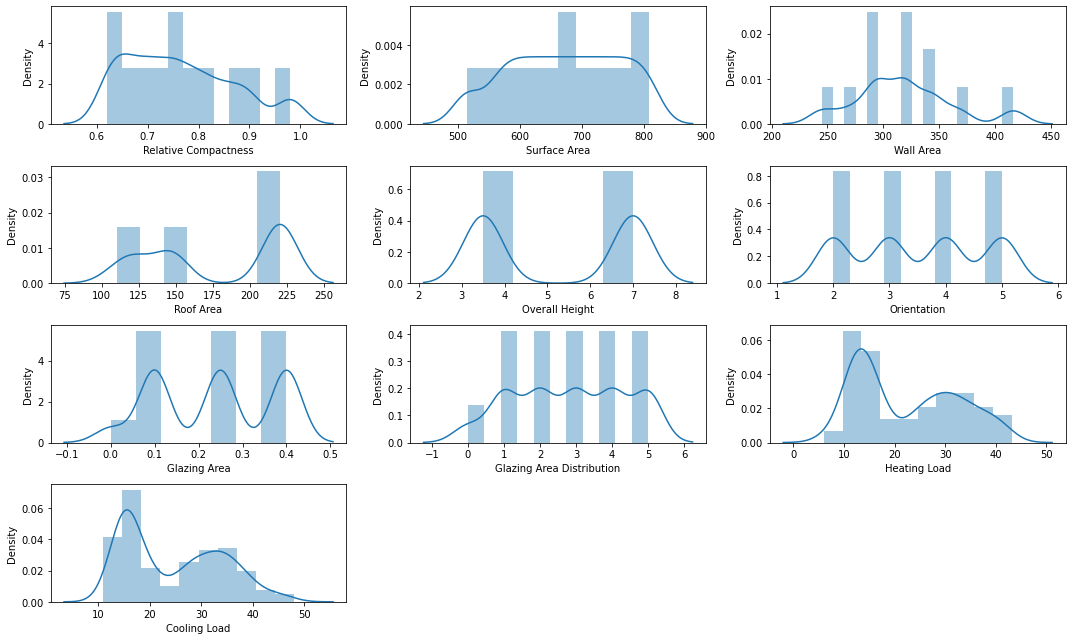

In [8]:
fig = plt.figure(figsize = (15,9))
for a,b in enumerate(df.columns):
    ax = fig.add_subplot(4,3,a+1)
    sns.distplot(df[b])
plt.tight_layout()


<AxesSubplot:>

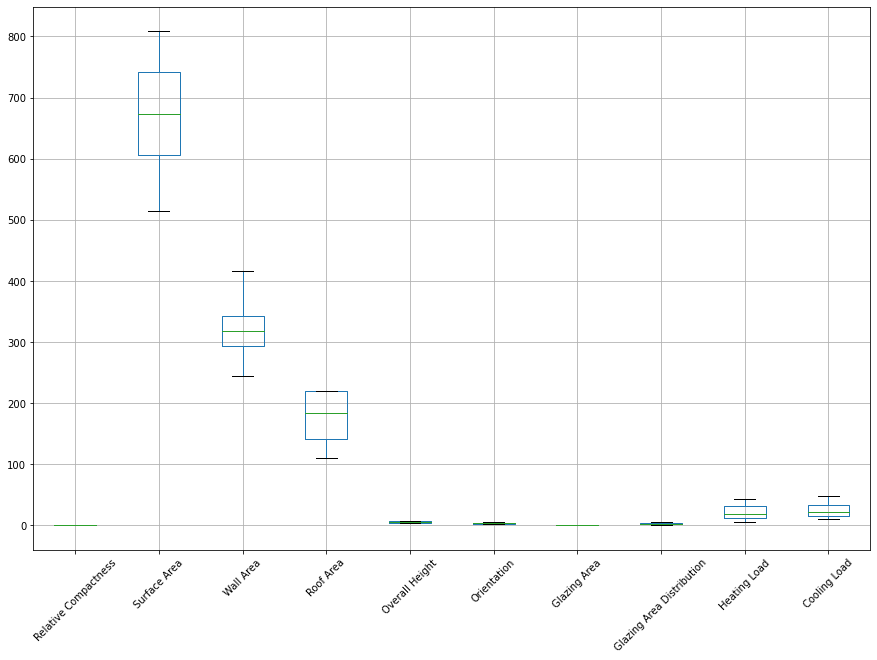

In [9]:
df.boxplot(figsize = (15,10),rot=45)

<AxesSubplot:>

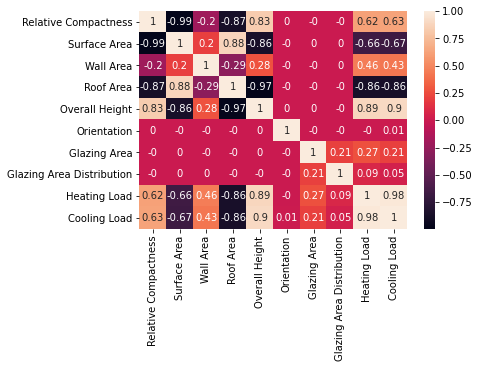

In [10]:
corr = df.corr()
corr = corr.round(2)

sns.heatmap(corr, annot = True)

In [11]:
X = df.iloc[:, 0:8]
y1 = df.iloc[:, 8]
y2 = df.iloc[:, 9]

print('Shape of X:', X.shape)
print('Shape of y1:', y1.shape)
print('Shape of y2:', y2.shape)

Shape of X: (768, 8)
Shape of y1: (768,)
Shape of y2: (768,)


In [12]:
test = SelectKBest(score_func = f_regression, k = 6).fit(X, y1)
X1 = test.transform(X)
X1 = pd.DataFrame(X1)

for i in range(len(X.columns)):
    print('%s F_value: %.2f'%(df.columns[i], test.scores_[i]))
    
print('\n# features After r_regression: %d  | As we have set k=6\n' % X1.shape[1])

features = []
for i in range(len(test.get_support())):
    if(test.get_support()[i]):
        features.append(df.columns[i])
print("Selected Features are: " , features)

Relative Compactness F_value: 484.05
Surface Area F_value: 585.26
Wall Area F_value: 200.73
Roof Area F_value: 2211.62
Overall Height F_value: 2900.59
Orientation F_value: 0.01
Glazing Area F_value: 60.16
Glazing Area Distribution F_value: 5.89

# features After r_regression: 6  | As we have set k=6

Selected Features are:  ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Glazing Area']


In [13]:
test = SelectKBest(score_func = f_regression, k = 6).fit(X, y2)
X1 = test.transform(X)
X1 = pd.DataFrame(X1)

for i in range(len(X.columns)):
    print('%s F_value: %.2f'%(df.columns[i], test.scores_[i]))

print('\n# features After r_regression: %d  | As we have set k=6\n' % X1.shape[1])

features = []
for i in range(len(test.get_support())):
    if(test.get_support()[i]):
        features.append(df.columns[i])
print("Selected Features are: " , features)

Relative Compactness F_value: 515.76
Surface Area F_value: 634.18
Wall Area F_value: 170.92
Roof Area F_value: 2226.03
Overall Height F_value: 3111.13
Orientation F_value: 0.16
Glazing Area F_value: 34.47
Glazing Area Distribution F_value: 1.96

# features After r_regression: 6  | As we have set k=6

Selected Features are:  ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Glazing Area']


In [14]:
X_new=df[features]
X_new.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area
0,0.98,514.5,294.0,110.25,7.0,0.0
1,0.98,514.5,294.0,110.25,7.0,0.0
2,0.98,514.5,294.0,110.25,7.0,0.0
3,0.98,514.5,294.0,110.25,7.0,0.0
4,0.90,563.5,318.5,122.50,7.0,0.0


In [15]:
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X_new, y1,y2, random_state = 20)
lr1 = LinearRegression().fit(X_train, y1_train)
yhat1=lr1.predict(X_test)
lr2 = LinearRegression().fit(X_train, y2_train)
yhat2=lr2.predict(X_test)

In [16]:
print("Y1: \ntrain r2: {} \ntest r2: {}".format(lr1.score(X_train, y1_train),lr1.score(X_test, y1_test)))

print("Y2: \ntrain r2: {} \ntest r2: {}".format(lr2.score(X_train, y2_train),lr2.score(X_test, y2_test)))


Y1: 
train r2: 0.9178454179559772 
test r2: 0.9052722625715615
Y2: 
train r2: 0.8884064681863733 
test r2: 0.8823439931247774


In [17]:
intercept=lr1.intercept_
slopes=lr1.coef_
intercept,slopes

(82.05276041666667,
 array([-6.51257140e+01,  3.66459520e+11, -3.66459520e+11, -7.32919040e+11,
         4.46082785e+00,  1.92476224e+01]))

In [18]:
intercept=lr2.intercept_
slopes=lr2.coef_
intercept,slopes

(89.61095486111111,
 array([-6.81323540e+01, -4.82126406e+10,  4.82126406e+10,  9.64252812e+10,
         4.66043826e+00,  1.36981139e+01]))

In [19]:
pearsonr(yhat1,y1_test)

(0.9517969326023961, 1.8475535977509856e-99)

In [20]:
pearsonr(yhat2,y2_test)

(0.940035170797613, 1.0730991482144105e-90)

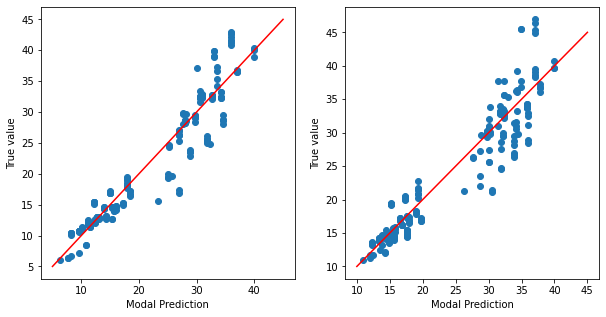

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(yhat1,y1_test)
plt.xlabel('Modal Prediction')
plt.ylabel('True value')
plt.plot([5,45],[5,45], 'k-',color='r')
plt.subplot(1,2,2)
plt.scatter(yhat2,y2_test)
plt.xlabel('Modal Prediction')
plt.ylabel('True value')
plt.plot([10,45],[10,45], 'k-',color='r')
plt.show()

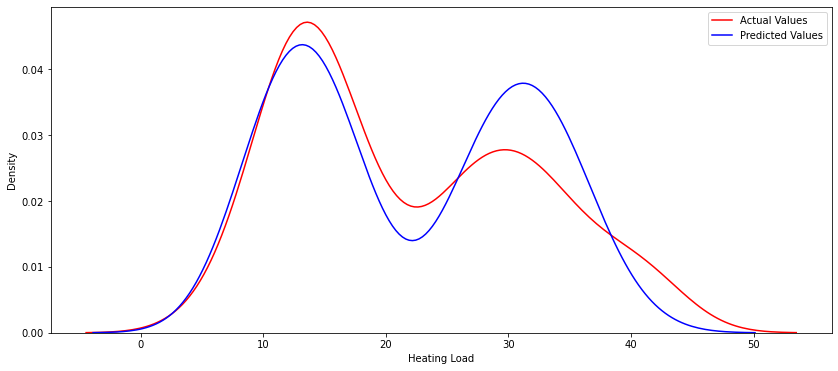

In [22]:
plt.figure(figsize=(14,6))
ax1=sns.distplot(y1_test,hist=False,color="r",label="Actual Values")
sns.distplot(yhat1,hist=False,color="b",label="Predicted Values",ax=ax1)
plt.legend()
plt.show()

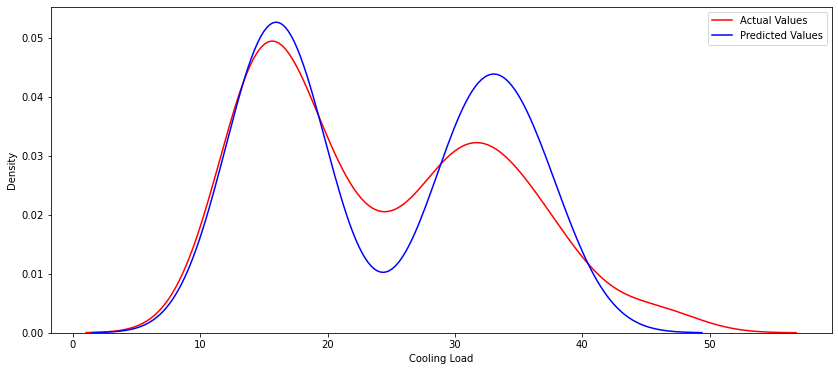

In [23]:
plt.figure(figsize=(14,6))
ax1=sns.distplot(y2_test,hist=False,color="r",label="Actual Values")
sns.distplot(yhat2,hist=False,color="b",label="Predicted Values",ax=ax1)
plt.legend()
plt.show()